In [5]:
import json
from configparser import ConfigParser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import plotly
from plotly.graph_objs import Scatter, Layout, Heatmap
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import chart_studio
import chart_studio.plotly as py

## Configure chart studio for interactive chart hosting

In [6]:
#create your account in https://chart-studio.plotly.com/
#add credentials to 'conf/plotly.ini'
conf=ConfigParser()
conf.read('conf/plotly.ini')
username=conf['plotly']['username']
api_key=conf['plotly']['apikey']
chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

## Colors for plotting

In [7]:
colors=json.loads(Path('utils/colors.json').read_text())
colors=list(colors.keys())[10:]

## Load data

In [8]:
df_male_w2v=pd.read_csv('data/interim/gender_bias/separated/bias_male_w2v.csv', index_col=0)
df_female_w2v=pd.read_csv('data/interim/gender_bias/separated/bias_female_w2v.csv', index_col=0)
df_male_w2v['gender']='male'
df_male_w2v['color_hdb']=df_male_w2v.cluster_hdb.apply(lambda x: colors[x])
df_male_w2v['color_agg']=df_male_w2v.clust_ag.apply(lambda x: colors[x])
df_male_w2v['color']='blue'
df_female_w2v['gender']='female'
df_female_w2v['color']='orange'
df_female_w2v['color_hdb']=df_female_w2v.cluster_hdb.apply(lambda x: colors[x])
df_female_w2v['color_agg']=df_female_w2v.clust_ag.apply(lambda x: colors[x])
df_w2v=df_female_w2v.append(df_male_w2v)

df_male_ft=pd.read_csv('data/interim/gender_bias/separated/bias_male_ft.csv', index_col=0)
df_female_ft=pd.read_csv('data/interim/gender_bias/separated/bias_female_ft.csv', index_col=0)
df_male_ft['gender']='male'
df_male_ft['color_hdb']=df_male_ft.cluster_hdb.apply(lambda x: colors[x])
df_male_ft['color_agg']=df_male_ft.clust_ag.apply(lambda x: colors[x])
df_male_ft['color']='blue'
df_female_ft['gender']='female'
df_female_ft['color']='orange'
df_female_ft['color_hdb']=df_female_ft.cluster_hdb.apply(lambda x: colors[x])
df_female_ft['color_agg']=df_female_ft.clust_ag.apply(lambda x: colors[x])
df_ft=df_female_ft.append(df_male_ft)

C:\Users\RistoHinno\AppData\Local\Temp\ipykernel_11128\3405790909.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_w2v=df_female_w2v.append(df_male_w2v)
C:\Users\RistoHinno\AppData\Local\Temp\ipykernel_11128\3405790909.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ft=df_female_ft.append(df_male_ft)


In [9]:
df_male_w2v.shape, df_female_w2v.shape

((564, 11), (707, 11))

In [10]:
df_male_ft.shape, df_female_ft.shape

((1330, 11), (331, 11))

## Simple visualization

In [11]:
def plot_gender_scatter(df_male, df_female, x_col='x', y_col='y', female_color='orange', male_color='blue',
                       alpha_female=1.0, alpha_male=0.1):
    ax=sns.scatterplot(data=df_male, x=x_col, y=y_col, color=male_color, alpha=alpha_male)
    ax=sns.scatterplot(data=df_female, x=x_col, y=y_col, color=female_color, alpha=alpha_female, ax=ax)

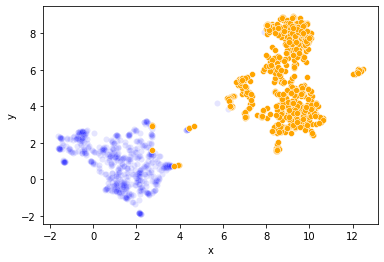

In [12]:
#w2v
plot_gender_scatter(df_male_w2v, df_female_w2v)

In [13]:
def make_plotly_scatter(df, filename, title, x_col='x', y_col='y', color_col='color', cluster_col=None,
                        opacity=0.5, save_folder='visualisations'):
    # Create a trace containing the scatter plot
    text=df.index.astype(str)
    if cluster_col is not None:
        text=text+ ' cluster: '+df[cluster_col].astype(str)
    scatter = go.Scatter(x = df[x_col],
                         y = df[y_col], 
                         mode = 'markers', \
                         marker = dict(size= 18, opacity = opacity, color = df[color_col],\
                                      line = dict(width = 2, color = 'rgb(0, 0, 0)')),
                         text = text)

    # Collect the trace(s) into the data to be plotted.
    data = [scatter]

    # Edit the layout
    layout = dict(title = title,
                  xaxis = dict(title = 'x'),
                  yaxis = dict(title = 'y'),
                  hovermode = 'closest',
                  )

    # Define the figure
    fig = dict(data=data, layout=layout)

    # Save figure and layout into html file
    plot_url = plotly.offline.plot(fig, filename=f'{save_folder}/{filename}.html')
    py.plot(fig, filename=filename, auto_open = True)

In [14]:
make_plotly_scatter(df_w2v, filename='scatter_gender_bias_w2v_embeddings',
                   title='Riigikogu gender bias word2vec embeddings')

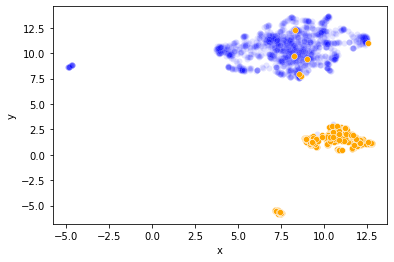

In [15]:
#ft
plot_gender_scatter(df_male_ft, df_female_ft)

In [223]:
make_plotly_scatter(df_ft, filename='scatter_gender_bias_ft_embeddings',
                   title='Riigikogu gender bias fastext embeddings')

## See clusters

#### Female HDB clusters

In [17]:
make_plotly_scatter(df_female_w2v, filename='scatter_female_bias_hdb_clust_w2v',
                    color_col='color_hdb', cluster_col='cluster_hdb',
                   title='Riigikogu female bias word2vec HDB cluters')

In [18]:
make_plotly_scatter(df_female_ft, filename='scatter_female_bias_hdb_clust_ft',
                    color_col='color_hdb', cluster_col='cluster_hdb',
                   title='Riigikogu female bias fasttext HDB cluters')

#### Male HDB clusters

In [19]:
make_plotly_scatter(df_male_w2v, filename='scatter_male_bias_hdb_clust_w2v',
                    color_col='color_hdb', cluster_col='cluster_hdb',
                   title='Riigikogu male bias word2vec HDB cluters')

In [20]:
make_plotly_scatter(df_male_ft, filename='scatter_male_bias_hdb_clust_ft',
                    color_col='color_hdb', cluster_col='cluster_hdb',
                   title='Riigikogu male bias fasttext HDB cluters')

### Cluster sizes (no of unique words)

#### w2v female HDB

<AxesSubplot:>

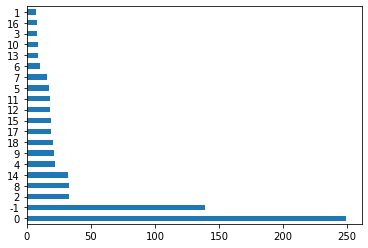

In [21]:
df_female_w2v.cluster_hdb.value_counts().plot(kind='barh')

#### w2v female Agglomerative clust

<AxesSubplot:>

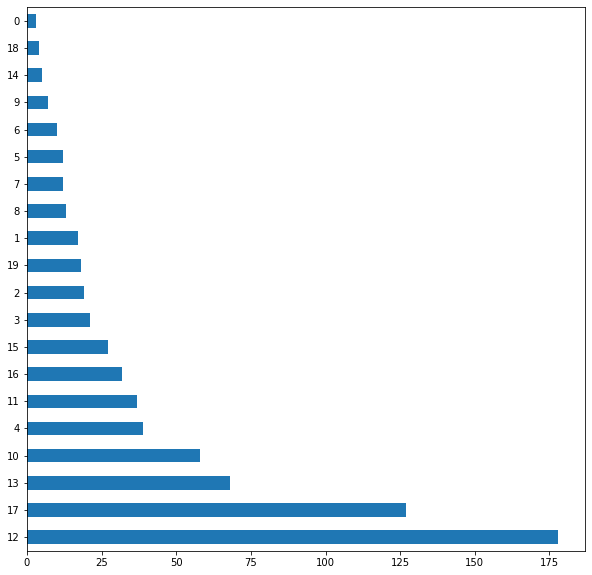

In [22]:
#agglomerative clustering
fig, ax =plt.subplots(figsize=(10, 10))
df_female_w2v.clust_ag.value_counts().plot(kind='barh', ax =ax)

#### FT female HDB

<AxesSubplot:>

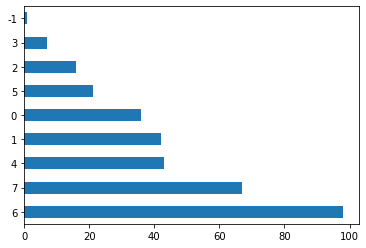

In [23]:
df_female_ft.cluster_hdb.value_counts().plot(kind='barh')

#### FT female Agglomerative clust

<AxesSubplot:>

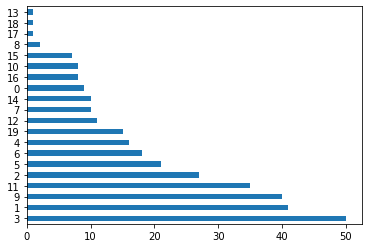

In [24]:
df_female_ft.clust_ag.value_counts().plot(kind='barh')

#### w2v male HDB 

<AxesSubplot:>

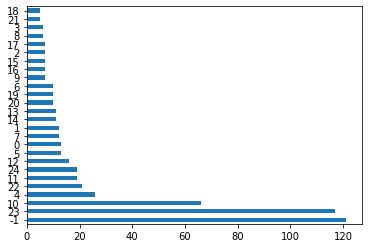

In [25]:
df_male_w2v.cluster_hdb.value_counts().plot(kind='barh')

#### w2v male agglomerative clust

<AxesSubplot:>

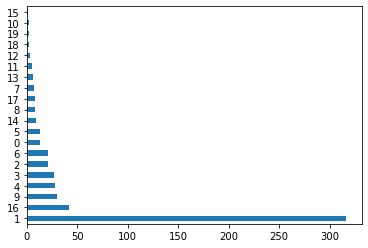

In [26]:
df_male_w2v.clust_ag.value_counts().plot(kind='barh')

#### FT male HDB

<AxesSubplot:>

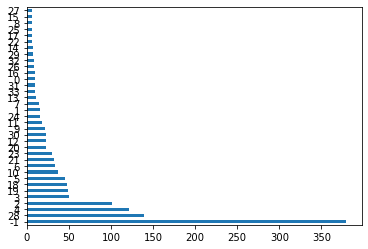

In [27]:
df_male_ft.cluster_hdb.value_counts().plot(kind='barh')

#### FT male agglomerative clust

<AxesSubplot:>

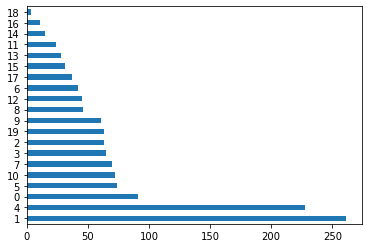

In [28]:
df_male_ft.clust_ag.value_counts().plot(kind='barh')

### Visualize clusters based on word counts

<AxesSubplot:ylabel='cluster_hdb'>

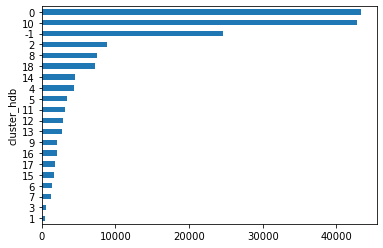

In [29]:
#cluster words overall count in text
df_female_w2v.groupby(['cluster_hdb'])['count'].sum().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='cluster_hdb'>

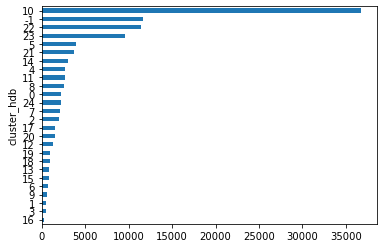

In [30]:
df_male_w2v.groupby(['cluster_hdb'])['count'].sum().sort_values().plot(kind='barh')

### Visualize cluster counts based on median effect size

<AxesSubplot:ylabel='cluster_hdb'>

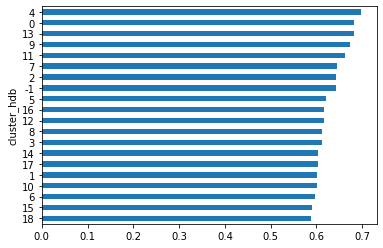

In [31]:
df_female_w2v.groupby(['cluster_hdb'])['female_effect_size'].median().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='cluster_hdb'>

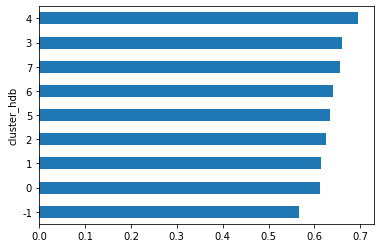

In [32]:
df_female_ft.groupby(['cluster_hdb'])['female_effect_size'].median().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='cluster_hdb'>

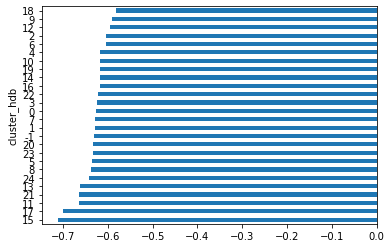

In [33]:
df_male_w2v.groupby(['cluster_hdb'])['female_effect_size'].median().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='cluster_hdb'>

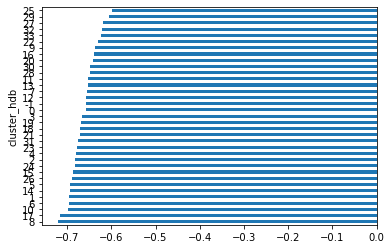

In [34]:
df_male_ft.groupby(['cluster_hdb'])['female_effect_size'].median().sort_values().plot(kind='barh')

## Relationship between effect size and count?

<AxesSubplot:xlabel='count', ylabel='female_effect_size'>

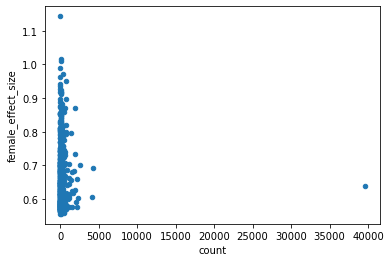

In [35]:
df_female_w2v.plot.scatter(x='count', y='female_effect_size')

<AxesSubplot:xlabel='count', ylabel='female_effect_size'>

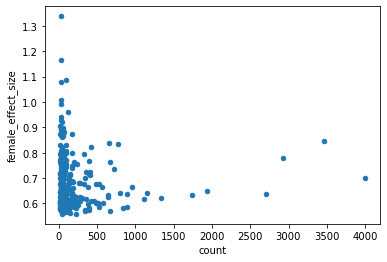

In [36]:
df_female_ft.plot.scatter(x='count', y='female_effect_size')

<AxesSubplot:xlabel='count', ylabel='female_effect_size'>

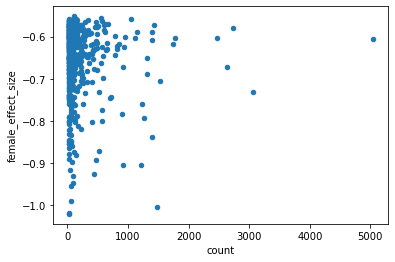

In [37]:
df_male_w2v.plot.scatter(x='count', y='female_effect_size')

<AxesSubplot:xlabel='count', ylabel='female_effect_size'>

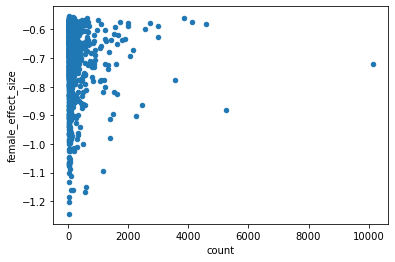

In [38]:
df_male_ft.plot.scatter(x='count', y='female_effect_size')

### Female

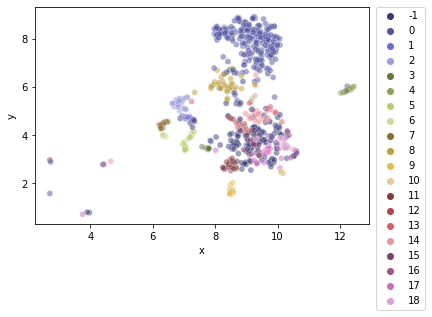

In [39]:
ax=sns.scatterplot(data=df_female_w2v, x="x", y="y", hue='cluster_hdb', palette="tab20b", alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

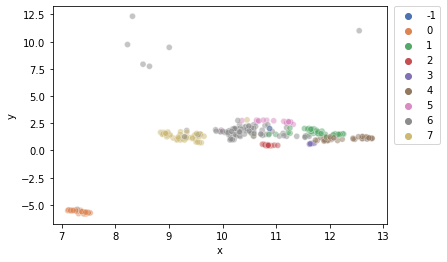

In [40]:
ax=sns.scatterplot(data=df_female_ft, x="x", y="y", hue='cluster_hdb',  palette="deep", alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [41]:
#how many words match
len(set(df_female_ft.index.tolist())&set(df_female_w2v.index.tolist()))

39

### Plot which words match in both vectors

In [137]:
words_match_female=set(df_female_ft.index.tolist())&set(df_female_w2v.index.tolist())

In [153]:
df_female_ft

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color,color_hdb,color_agg,cluster_hdb_name
psüühika-,1.337927,0.000043,3,6,10.034159,1.672838,23,female,orange,darksalmon,darkorange,"haigus, vananemine"
psüühikahäirega,1.164181,0.000307,3,6,9.962230,1.710349,31,female,orange,darksalmon,darkorange,"haigus, vananemine"
õppe-,1.086988,0.000781,0,7,9.263881,1.091607,95,female,orange,darkseagreen,darkkhaki,"õpe, kool"
psüühikahäire,1.078061,0.000909,3,6,10.137133,1.761380,29,female,orange,darksalmon,darkorange,"haigus, vananemine"
kehvemasse,1.007580,0.001547,15,3,11.713019,0.662870,27,female,orange,darkorange,dodgerblue,"halvem, parem"
...,...,...,...,...,...,...,...,...,...,...,...,...
levima,0.564956,0.047371,10,1,11.647244,1.961855,71,female,orange,darkmagenta,darkturquoise,omadussõnad
leiva,0.564598,0.047133,19,6,10.490474,2.257112,71,female,orange,darksalmon,gold,"haigus, vananemine"
lähisuhtevägivalla,0.564216,0.047991,3,6,10.494103,1.792368,150,female,orange,darksalmon,darkorange,"haigus, vananemine"
hilisemal,0.559377,0.049901,1,4,12.075688,1.176587,38,female,orange,darkorchid,darkmagenta,"raskem, halvem"


C:\Users\RistoHinno\AppData\Local\Temp\ipykernel_11128\119271928.py:2: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



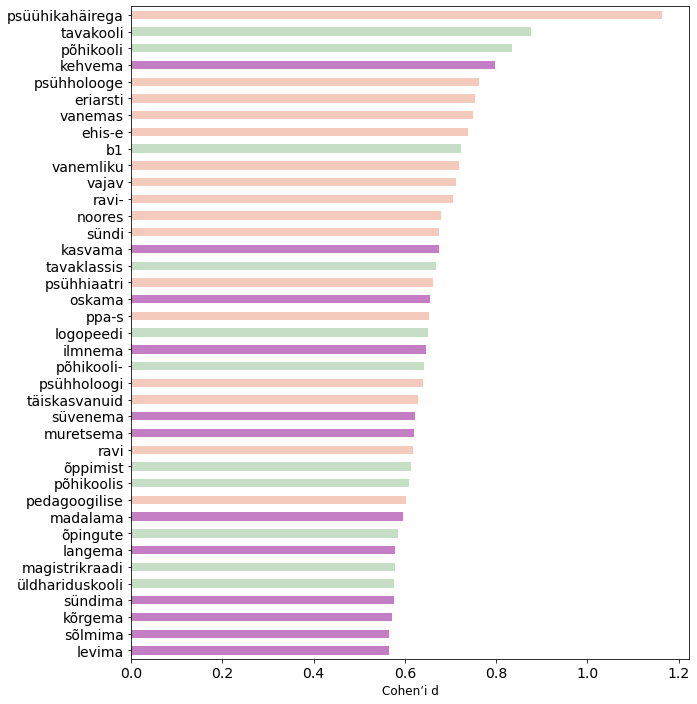

In [183]:
fig, ax =plt.subplots(figsize=(10, 12))
df_female_match=df_female_ft.loc[words_match_female].sort_values('female_effect_size')
ax = df_female_match[['female_effect_size']]\
    .plot(kind='barh', ax=ax)
for patch,color in zip(ax.patches,df_female_match.color_hdb):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Cohen’i d', fontsize=12)
ax.get_legend().remove()

<AxesSubplot:>

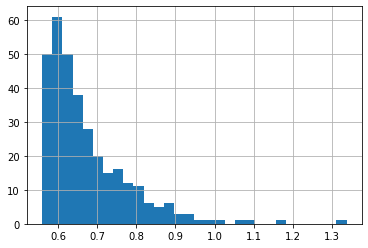

In [43]:
df_female_ft.female_effect_size.hist(bins=30)

<AxesSubplot:>

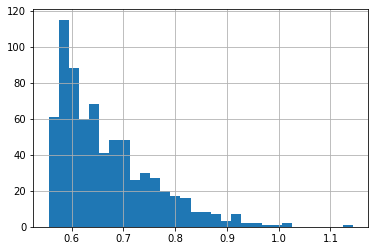

In [44]:
df_female_w2v.female_effect_size.hist(bins=30)

<AxesSubplot:>

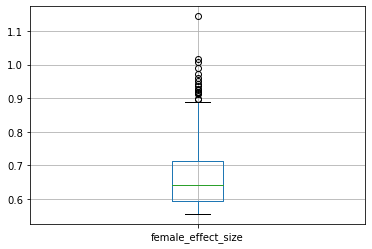

In [45]:
df_female_w2v.boxplot(column=['female_effect_size'])  

<AxesSubplot:>

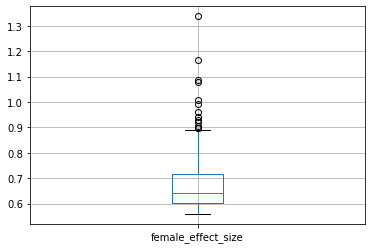

In [46]:
df_female_ft.boxplot(column=['female_effect_size'])  

### Male

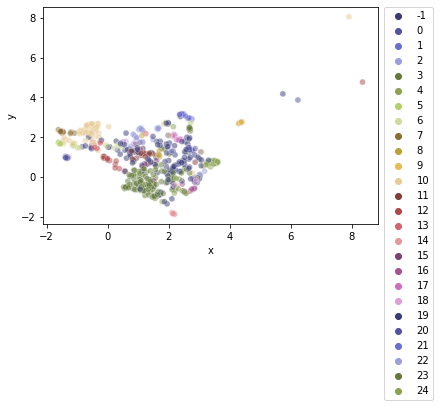

In [47]:
ax=sns.scatterplot(data=df_male_w2v, x="x", y="y", hue='cluster_hdb', palette="tab20b", alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

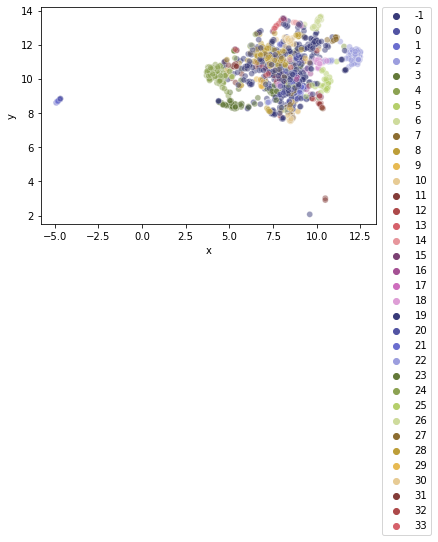

In [48]:
ax=sns.scatterplot(data=df_male_ft, x="x", y="y", hue='cluster_hdb', palette="tab20b", alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [49]:
len(set(df_male_ft.index.tolist())&set(df_male_w2v.index.tolist()))

80

In [174]:
#same in both vectors
words_match_male=set(df_male_ft.index.tolist())&set(df_male_w2v.index.tolist())

### Plot words matching male vectors

C:\Users\RistoHinno\AppData\Local\Temp\ipykernel_11128\3195738900.py:2: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



Text(0.5, 0, 'Cohen’i d')

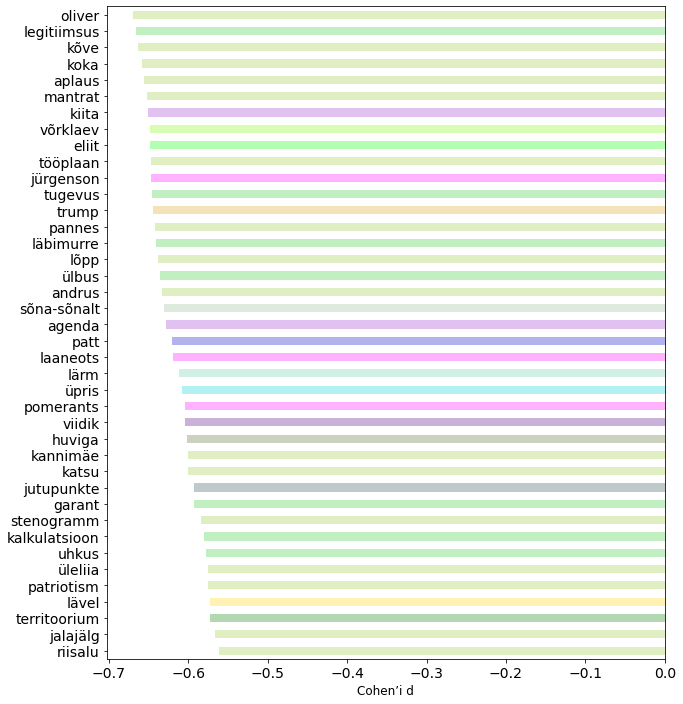

In [187]:
fig, ax =plt.subplots(figsize=(10, 12))
df_male_match=df_male_ft.loc[words_match_male].sort_values('female_effect_size', ascending=False)
ax = df_male_match[['female_effect_size']].head(40)\
    .plot(kind='barh', ax=ax)
for patch,color in zip(ax.patches, df_male_match.color_hdb):
    patch.set_facecolor(color)
    patch.set_alpha(0.3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.get_legend().remove()
plt.xlabel('Cohen’i d', fontsize=12)

<AxesSubplot:>

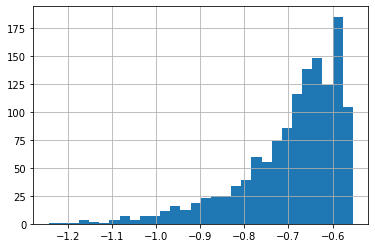

In [51]:
df_male_ft.female_effect_size.hist(bins=30)

<AxesSubplot:>

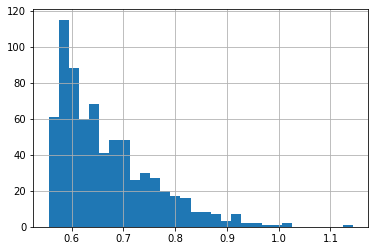

In [52]:
df_female_w2v.female_effect_size.hist(bins=30)

<AxesSubplot:>

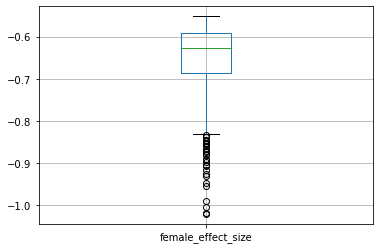

In [53]:
df_male_w2v.boxplot(column=['female_effect_size'])  

<AxesSubplot:>

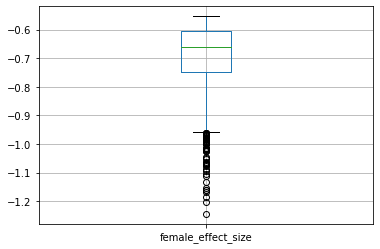

In [54]:
df_male_ft.boxplot(column=['female_effect_size'])  

## Male in w2v but female in FT

In [55]:
set(df_female_ft.index.tolist())&set(df_male_w2v.index.tolist())

set()

## Female in FT but male in w2v

In [56]:
set(df_male_ft.index.tolist())&set(df_female_w2v.index.tolist())

{'vedu'}

## Try to see some female words

In [57]:
#words most female
df_female_w2v.sort_values('female_effect_size', ascending=False).head(30)

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color,color_hdb,color_agg
juurutama,1.143367,0.000385,13,0,9.635041,7.861023,20,female,orange,darkkhaki,deepskyblue
finantseerima,1.017046,0.001592,10,0,9.237131,7.696671,56,female,orange,darkkhaki,darkturquoise
valmima,1.008965,0.001881,16,0,8.038519,8.096758,111,female,orange,darkkhaki,firebrick
harjuma,0.988480,0.002135,13,0,8.768991,8.875234,21,female,orange,darkkhaki,deepskyblue
taotlema,0.971773,0.002301,11,0,9.673896,7.553660,377,female,orange,darkkhaki,darkviolet
käivituma,0.961220,0.002586,13,0,8.208339,8.222179,26,female,orange,darkkhaki,deepskyblue
töötama,0.952283,0.002839,11,0,8.888930,7.702555,821,female,orange,darkkhaki,darkviolet
määratlema,0.942401,0.003157,13,0,9.371265,8.539078,35,female,orange,darkkhaki,deepskyblue
lisanduma,0.935941,0.002811,10,0,8.545391,8.006986,40,female,orange,darkkhaki,darkturquoise
tõstatama,0.927435,0.003317,19,0,9.759993,8.527399,24,female,orange,darkkhaki,gold


Text(0, 0.5, '')

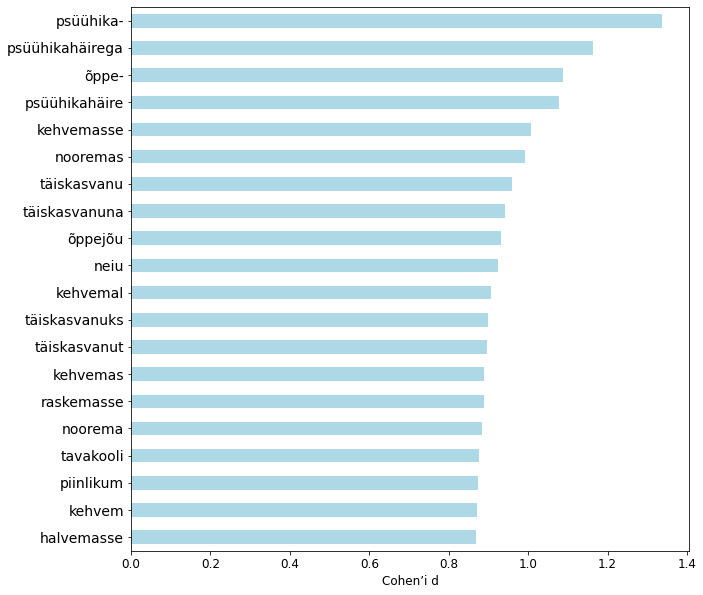

In [218]:
#words most female
fig, ax =plt.subplots(figsize=(10, 10))
df_female_ft.sort_values('female_effect_size', ascending=False).head(20)['female_effect_size'].\
    sort_values().plot(kind='barh', color='lightblue', ax=ax)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Cohen’i d', fontsize=12)
plt.ylabel('')

In [59]:
df_female_ft.sort_values('female_effect_size', ascending=False).head().index

Index(['psüühika-', 'psüühikahäirega', 'õppe-', 'psüühikahäire', 'kehvemasse'], dtype='object')

## See some male words

In [60]:
df_male_w2v.sort_values('female_effect_size', ascending=True).head(30)

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color_hdb,color_agg,color
sõerdile,-1.021268,0.998612,16,5,-1.574706,1.658165,30,male,darkred,firebrick,blue
peangi,-1.018271,0.998401,1,1,2.760018,2.916470,20,male,darkmagenta,darkmagenta,blue
jaanus,-1.004130,0.998263,0,10,-0.673930,2.131979,1477,male,darkturquoise,darkkhaki,blue
krimm,-0.989838,0.997932,1,12,0.551765,0.279491,52,male,deeppink,darkmagenta,blue
okupeerinud,-0.955118,0.997177,1,23,1.756345,1.445126,52,male,hotpink,darkmagenta,blue
välisministrile,-0.947992,0.996986,3,-1,0.067607,1.509243,85,male,yellowgreen,darkorange,blue
hansson,-0.931199,0.996750,3,13,-0.384500,1.442010,92,male,deepskyblue,darkorange,blue
õnne,-0.925720,0.996429,7,24,2.074904,-0.051207,439,male,indianred,darkseagreen,blue
viimse,-0.916476,0.996413,1,23,2.022612,1.156509,40,male,hotpink,darkmagenta,blue
andrus,-0.906184,0.996096,9,10,-0.929041,2.292151,1215,male,darkturquoise,darkslategray,blue


In [211]:
df_male_ft.sort_values('female_effect_size', ascending=True).head(20)

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color_hdb,color_agg,color,cluster_hdb_name
loosungiga,-1.244283,0.999865,10,2,12.384358,11.696504,31,male,darkolivegreen,darkturquoise,blue,"loosungiga, kirvega"
tormata,-1.202379,0.999771,5,4,3.907009,10.012736,35,male,darkorchid,darkred,blue,"tormata, mängita"
ideena,-1.183721,0.999731,3,5,10.622167,9.758638,27,male,darkred,darkorange,blue,"ideena, veena"
nimekiri,-1.166723,0.999666,1,28,11.647769,10.540583,548,male,limegreen,darkmagenta,blue,"nimekiri, käekiri"
toompea,-1.161083,0.999634,2,-1,9.992006,12.730493,171,male,yellowgreen,darkolivegreen,blue,muu
tuld,-1.160888,0.999632,1,-1,10.173042,11.258535,90,male,yellowgreen,darkmagenta,blue,muu
lipu,-1.151933,0.999635,16,20,7.974348,9.155059,592,male,goldenrod,firebrick,blue,"lipu, lipp"
käekiri,-1.131399,0.999541,1,28,8.982874,12.527805,26,male,limegreen,darkmagenta,blue,"nimekiri, käekiri"
top-up,-1.112270,0.999385,19,18,9.434256,10.492332,87,male,fuchsia,gold,blue,reservfond
barack,-1.102836,0.999403,19,-1,8.645186,10.471523,31,male,yellowgreen,gold,blue,muu


Text(0, 0.5, '')

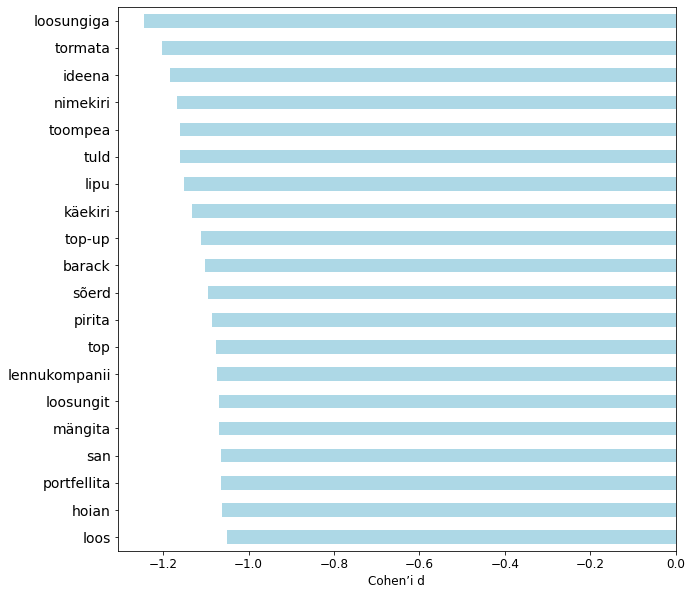

In [222]:
#words most female
fig, ax =plt.subplots(figsize=(10, 10))
df_male_ft.sort_values('female_effect_size', ascending=True).head(20)['female_effect_size'].\
    sort_values(ascending=False).plot(kind='barh', color='lightblue', ax=ax)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Cohen’i d', fontsize=12)
plt.ylabel('')

## Clusters with highest female median scores

### Female

In [62]:
df_female_w2v.groupby('cluster_hdb')['female_effect_size'].median().sort_values()

cluster_hdb
 18    0.587914
 15    0.590381
 6     0.597728
 10    0.601868
 1     0.602309
 17    0.603552
 14    0.603983
 3     0.611304
 8     0.613171
 12    0.615988
 16    0.616685
 5     0.621271
-1     0.641923
 2     0.643240
 7     0.644667
 11    0.662436
 9     0.672905
 13    0.681936
 0     0.682258
 4     0.696766
Name: female_effect_size, dtype: float64

In [63]:
df_female_w2v[df_female_w2v.cluster_hdb==5]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color,color_hdb,color_agg
kõrgema,0.871028,0.005556,14,5,7.237442,3.984995,674,female,orange,darkred,dimgray
madala,0.816420,0.008236,14,5,7.254707,4.132850,330,female,orange,darkred,dimgray
madalama,0.793752,0.010286,14,5,7.192187,3.927781,387,female,orange,darkred,dimgray
vähese,0.746549,0.014687,14,5,7.329712,4.139655,298,female,orange,darkred,dimgray
täiendavaid,0.704349,0.020783,17,5,7.037156,3.366108,1107,female,orange,darkred,forestgreen
värskemaid,0.681372,0.024124,12,5,7.006704,3.527511,27,female,orange,darkred,deeppink
ennetavaid,0.653164,0.027809,12,5,7.071292,3.437703,29,female,orange,darkred,deeppink
kaasamata,0.632008,0.030812,12,5,9.188982,5.530156,49,female,orange,darkred,deeppink
lihtsamaid,0.621271,0.035069,12,5,7.075998,3.492404,59,female,orange,darkred,deeppink
elektroonilisi,0.620575,0.032103,12,5,7.027740,3.443848,76,female,orange,darkred,deeppink


In [64]:
df_female_ft.groupby('cluster_hdb')['female_effect_size'].median().sort_values()

cluster_hdb
-1    0.566590
 0    0.612225
 1    0.615174
 2    0.624965
 5    0.632836
 6    0.640821
 7    0.655614
 3    0.660072
 4    0.694861
Name: female_effect_size, dtype: float64

In [65]:
df_female_ft[df_female_ft.cluster_hdb==4]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color,color_hdb,color_agg
kehvemal,0.905584,0.004274,1,4,11.885543,1.000522,20,female,orange,darkorchid,darkmagenta
kehvemas,0.888232,0.004608,1,4,11.950114,0.910017,59,female,orange,darkorchid,darkmagenta
piinlikum,0.873575,0.004870,1,4,12.604458,1.086848,21,female,orange,darkorchid,darkmagenta
kehvem,0.872345,0.005460,1,4,12.143444,0.917112,170,female,orange,darkorchid,darkmagenta
kehvemat,0.803672,0.010222,1,4,11.946863,0.981941,24,female,orange,darkorchid,darkmagenta
vaesem,0.793525,0.009976,1,4,12.432180,1.126891,55,female,orange,darkorchid,darkmagenta
kummalisem,0.782606,0.010910,1,4,12.703606,1.126564,37,female,orange,darkorchid,darkmagenta
tõenäolisem,0.778619,0.012121,1,4,12.698220,1.147845,48,female,orange,darkorchid,darkmagenta
sügavam,0.769540,0.012774,1,4,12.615482,1.255519,95,female,orange,darkorchid,darkmagenta
sobivam,0.760789,0.014775,1,4,12.773618,1.102872,51,female,orange,darkorchid,darkmagenta


In [66]:
df_female_ft[df_female_ft.cluster_hdb==7]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color,color_hdb,color_agg
õppe-,1.086988,0.000781,0,7,9.263881,1.091607,95,female,orange,darkseagreen,darkkhaki
õppejõu,0.930382,0.003201,9,7,9.225064,1.020131,28,female,orange,darkseagreen,darkslategray
neiu,0.922881,0.003975,3,7,10.569844,1.366204,36,female,orange,darkseagreen,darkorange
tavakooli,0.875551,0.005139,9,7,8.927985,1.553022,49,female,orange,darkseagreen,darkslategray
b2,0.866227,0.006111,12,7,9.604037,0.717400,58,female,orange,darkseagreen,deeppink
...,...,...,...,...,...,...,...,...,...,...,...
üldhariduskooli,0.576064,0.045670,9,7,8.955472,1.544405,29,female,orange,darkseagreen,darkslategray
noodi,0.574837,0.046969,9,7,8.932563,1.600862,23,female,orange,darkseagreen,darkslategray
õpilase,0.573590,0.048230,0,7,9.294493,1.271629,393,female,orange,darkseagreen,darkkhaki
õppimas,0.573096,0.045409,9,7,9.321971,1.201464,24,female,orange,darkseagreen,darkslategray


In [67]:
df_female_ft[df_female_ft.cluster_hdb==6]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color,color_hdb,color_agg
psüühika-,1.337927,0.000043,3,6,10.034159,1.672838,23,female,orange,darksalmon,darkorange
psüühikahäirega,1.164181,0.000307,3,6,9.962230,1.710349,31,female,orange,darksalmon,darkorange
psüühikahäire,1.078061,0.000909,3,6,10.137133,1.761380,29,female,orange,darksalmon,darkorange
nooremas,0.993021,0.001899,2,6,11.541716,1.254105,32,female,orange,darksalmon,darkolivegreen
täiskasvanu,0.960464,0.002331,2,6,10.212821,1.001810,114,female,orange,darksalmon,darkolivegreen
...,...,...,...,...,...,...,...,...,...,...,...
vananeva,0.572004,0.045665,19,6,10.842675,2.356231,62,female,orange,darksalmon,gold
%,0.570208,0.045926,12,6,9.289685,1.264240,24,female,orange,darksalmon,deeppink
nakkushaiguse,0.569120,0.047602,3,6,10.314016,1.721584,79,female,orange,darksalmon,darkorange
leiva,0.564598,0.047133,19,6,10.490474,2.257112,71,female,orange,darksalmon,gold


In [68]:
df_female_ft[df_female_ft.cluster_hdb==5]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color,color_hdb,color_agg
"‑,",0.796939,0.010012,12,5,9.973598,1.879182,96,female,orange,darkred,deeppink
aab,0.796828,0.009162,13,5,10.360511,2.752401,325,female,orange,darkred,deepskyblue
napib,0.765256,0.012556,16,5,10.643558,2.661199,196,female,orange,darkred,firebrick
kasvav,0.757259,0.012795,14,5,11.262161,2.622675,233,female,orange,darkred,dimgray
süveneb,0.686247,0.021159,16,5,10.953076,2.732463,180,female,orange,darkred,firebrick
süvenev,0.684575,0.021652,16,5,11.200891,2.623824,37,female,orange,darkred,firebrick
kasva,0.680282,0.023655,14,5,11.185456,2.608971,279,female,orange,darkred,dimgray
kasvamas,0.645596,0.030815,14,5,11.268342,2.613021,99,female,orange,darkred,dimgray
kasvava,0.640889,0.032438,14,5,11.203237,2.616854,166,female,orange,darkred,dimgray
kasvab,0.638323,0.031190,14,5,11.140501,2.683856,2707,female,orange,darkred,dimgray


In [69]:
df_female_ft[df_female_ft.cluster_hdb==2]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color,color_hdb,color_agg
õppesse,0.868800,0.005779,4,2,10.807843,0.442191,29,female,orange,darkolivegreen,darkorchid
asjasse,0.769020,0.012261,4,2,10.912247,0.438546,399,female,orange,darkolivegreen,darkorchid
hooldekodusse,0.694477,0.022710,4,2,10.779656,0.565811,72,female,orange,darkolivegreen,darkorchid
haiglasse,0.681555,0.023377,4,2,10.742759,0.574880,266,female,orange,darkolivegreen,darkorchid
puusse,0.653087,0.028076,4,2,10.877280,0.446954,43,female,orange,darkolivegreen,darkorchid
kuusse,0.644100,0.027969,4,2,10.826864,0.480060,20,female,orange,darkolivegreen,darkorchid
noortesse,0.642810,0.028377,4,2,10.849909,0.451000,23,female,orange,darkolivegreen,darkorchid
lahku,0.626152,0.033743,4,2,10.842749,0.528587,278,female,orange,darkolivegreen,darkorchid
emo-sse,0.623778,0.034308,4,2,10.848776,0.485893,43,female,orange,darkolivegreen,darkorchid
tartusse,0.610518,0.036743,4,2,10.791874,0.511995,221,female,orange,darkolivegreen,darkorchid


In [70]:
df_female_ft[df_female_ft.cluster_hdb==1]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color,color_hdb,color_agg
noorema,0.882632,0.004989,5,1,11.593460,1.436447,67,female,orange,darkmagenta,darkred
kumu,0.804599,0.009642,3,1,10.532447,1.607972,40,female,orange,darkmagenta,darkorange
kehvema,0.797386,0.009671,5,1,11.931400,1.196676,46,female,orange,darkmagenta,darkred
vaesema,0.689411,0.023087,5,1,11.694815,1.579133,38,female,orange,darkmagenta,darkred
raskema,0.684448,0.022993,5,1,12.037684,1.337107,47,female,orange,darkmagenta,darkred
vanema,0.677937,0.023655,10,1,11.258389,1.592370,481,female,orange,darkmagenta,darkturquoise
kergema,0.675139,0.023904,5,1,11.917046,1.487332,62,female,orange,darkmagenta,darkred
kasvama,0.674947,0.023291,5,1,11.610394,2.029435,525,female,orange,darkmagenta,darkred
halvema,0.674133,0.025431,5,1,11.911430,1.319452,31,female,orange,darkmagenta,darkred
õppima,0.665621,0.026823,10,1,11.639400,1.939004,959,female,orange,darkmagenta,darkturquoise


In [71]:
df_female_ft[df_female_ft.cluster_hdb==0]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color,color_hdb,color_agg
443,0.780385,0.011931,11,0,7.476399,-5.673831,33,female,orange,darkkhaki,darkviolet
619,0.725981,0.016366,11,0,7.438532,-5.793808,25,female,orange,darkkhaki,darkviolet
319,0.696438,0.022475,11,0,7.312816,-5.797386,25,female,orange,darkkhaki,darkviolet
513,0.694330,0.020818,11,0,7.369381,-5.673068,42,female,orange,darkkhaki,darkviolet
613,0.675638,0.024851,11,0,7.352229,-5.640230,25,female,orange,darkkhaki,darkviolet
725,0.665155,0.025650,11,0,7.352275,-5.501101,27,female,orange,darkkhaki,darkviolet
357,0.658513,0.026071,11,0,7.373418,-5.606141,23,female,orange,darkkhaki,darkviolet
313,0.654957,0.028047,11,0,7.168989,-5.536407,25,female,orange,darkkhaki,darkviolet
39%,0.654731,0.029267,11,0,7.297061,-5.508478,64,female,orange,darkkhaki,darkviolet
434,0.648433,0.029409,11,0,7.510612,-5.723145,25,female,orange,darkkhaki,darkviolet


### Male

In [72]:
df_male_ft.groupby('cluster_hdb')['female_effect_size'].median().sort_values()

cluster_hdb
 8    -0.720913
 17   -0.716080
 10   -0.698120
 6    -0.694866
 1    -0.694566
 14   -0.693734
 5    -0.692701
 26   -0.689394
 15   -0.687362
 24   -0.681173
 2    -0.680988
 4    -0.680490
 23   -0.678033
 31   -0.674806
 21   -0.670588
 18   -0.670250
 19   -0.667749
 3    -0.667253
 0    -0.658267
-1    -0.657993
 12   -0.657977
 7    -0.654037
 13   -0.652923
 11   -0.651993
 28   -0.648854
 30   -0.648600
 20   -0.642290
 16   -0.638133
 9    -0.637542
 22   -0.629655
 33   -0.622144
 32   -0.621281
 27   -0.618766
 29   -0.605820
 25   -0.598700
Name: female_effect_size, dtype: float64

In [73]:
df_male_ft[df_male_ft.cluster_hdb==17]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color_hdb,color_agg,color
veebileht,-0.909253,0.996118,4,17,9.053320,13.146708,26,male,forestgreen,darkorchid,blue
veebilehel,-0.753745,0.986074,4,17,9.135563,13.115005,137,male,forestgreen,darkorchid,blue
veebilehe,-0.742519,0.985301,4,17,9.070722,13.185052,55,male,forestgreen,darkorchid,blue
koduleht,-0.689640,0.979588,4,17,9.065339,13.166763,21,male,forestgreen,darkorchid,blue
kodulehe,-0.673808,0.973597,4,17,9.067822,13.177305,28,male,forestgreen,darkorchid,blue
kodulehekülg,-0.593787,0.957136,4,17,9.100713,13.131932,21,male,forestgreen,darkorchid,blue


In [74]:
df_male_ft[df_male_ft.cluster_hdb==10]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color_hdb,color_agg,color
portfellis,-0.963207,0.997534,3,10,8.730397,12.059790,32,male,darkturquoise,darkorange,blue
lootis,-0.951995,0.997429,1,10,7.680960,12.305597,32,male,darkturquoise,darkmagenta,blue
sõitis,-0.916304,0.996231,0,10,6.080849,8.367376,103,male,darkturquoise,darkkhaki,blue
mängis,-0.852803,0.993690,2,10,4.762864,11.053499,47,male,darkturquoise,darkolivegreen,blue
pildis,-0.847405,0.992745,3,10,8.631122,12.400560,175,male,darkturquoise,darkorange,blue
kotis,-0.811270,0.990925,3,10,8.239276,12.304158,51,male,darkturquoise,darkorange,blue
sahtlis,-0.804775,0.990954,3,10,8.362933,12.314973,63,male,darkturquoise,darkorange,blue
ketis,-0.791206,0.988912,3,10,8.274526,12.352696,38,male,darkturquoise,darkorange,blue
tornis,-0.775346,0.987415,3,10,8.295581,12.383965,33,male,darkturquoise,darkorange,blue
äris,-0.757852,0.985518,3,10,8.406983,12.270586,39,male,darkturquoise,darkorange,blue


In [75]:
df_male_ft[df_male_ft.cluster_hdb==6]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color_hdb,color_agg,color
visalt,-0.993296,0.998033,4,6,10.170958,13.591833,42,male,darksalmon,darkorchid,blue
uhkelt,-0.898392,0.995354,4,6,10.024963,13.399196,101,male,darksalmon,darkorchid,blue
räpakalt,-0.884142,0.994913,4,6,10.264549,13.618093,22,male,darksalmon,darkorchid,blue
pildilt,-0.883777,0.995273,4,6,9.785580,12.989670,20,male,darksalmon,darkorchid,blue
toompealt,-0.876634,0.994233,2,6,9.993071,12.968458,27,male,darksalmon,darkolivegreen,blue
uhke,-0.818889,0.991353,19,6,6.247165,11.842174,316,male,darksalmon,gold,blue
laudadelt,-0.814194,0.991198,4,6,9.893619,12.954744,26,male,darksalmon,darkorchid,blue
hoogsalt,-0.804157,0.989792,4,6,10.207795,13.613438,83,male,darksalmon,darkorchid,blue
usinalt,-0.794907,0.989440,4,6,10.176629,13.551802,66,male,darksalmon,darkorchid,blue
tuult,-0.784571,0.988965,0,6,10.081781,13.154984,95,male,darksalmon,darkkhaki,blue


In [76]:
df_male_ft[df_male_ft.cluster_hdb==14]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color_hdb,color_agg,color
ajaleht,-0.819695,0.991720,1,14,8.907084,13.198334,98,male,dimgray,darkmagenta,blue
ajalehe,-0.756771,0.986238,1,14,8.936380,13.192472,86,male,dimgray,darkmagenta,blue
päevaleht,-0.736892,0.984141,1,14,8.681444,13.313769,66,male,dimgray,darkmagenta,blue
õhtuleht,-0.693734,0.977587,4,14,8.892493,13.262004,35,male,dimgray,darkorchid,blue
äripäev,-0.680927,0.975386,1,14,8.173429,13.512901,46,male,dimgray,darkmagenta,blue
päevalehe,-0.650463,0.971611,1,14,8.803303,13.305324,63,male,dimgray,darkmagenta,blue
õhtulehe,-0.571831,0.953653,4,14,8.937371,13.233051,39,male,dimgray,darkorchid,blue


In [77]:
df_male_ft[df_male_ft.cluster_hdb==5]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color_hdb,color_agg,color
ideena,-1.183721,0.999731,3,5,10.622167,9.758638,27,male,darkred,darkorange,blue
veena,-1.048293,0.998978,3,5,10.642095,9.558666,38,male,darkred,darkorange,blue
masina,-0.988156,0.997879,3,5,10.456399,9.518234,26,male,darkred,darkorange,blue
regina,-0.987103,0.997843,3,5,10.607503,9.584203,26,male,darkred,darkorange,blue
näitena,-0.940892,0.997118,3,5,10.672376,9.844067,384,male,darkred,darkorange,blue
kana,-0.905419,0.996365,9,5,10.521969,9.404398,77,male,darkred,darkslategray,blue
sinagi,-0.904248,0.996002,4,5,9.916980,9.551494,26,male,darkred,darkorchid,blue
jõuluvana,-0.901913,0.995647,4,5,10.390475,9.516273,186,male,darkred,darkorchid,blue
pagana,-0.899416,0.995365,3,5,10.520828,9.494072,32,male,darkred,darkorange,blue
näidetena,-0.882792,0.995011,3,5,10.673123,9.849064,22,male,darkred,darkorange,blue


In [78]:
df_male_w2v.groupby('cluster_hdb')['female_effect_size'].median().sort_values()

cluster_hdb
 15   -0.711778
 17   -0.699287
 11   -0.663897
 21   -0.663516
 13   -0.662770
 24   -0.641110
 8    -0.637718
 5    -0.636074
 23   -0.633952
 20   -0.633385
-1    -0.631080
 1    -0.629136
 7    -0.627704
 0    -0.625395
 3    -0.624610
 22   -0.622789
 16   -0.618555
 14   -0.618506
 19   -0.617536
 10   -0.617502
 4    -0.616746
 6    -0.604902
 2    -0.604050
 12   -0.595802
 9    -0.590942
 18   -0.582813
Name: female_effect_size, dtype: float64

In [79]:
df_male_w2v[df_male_w2v.cluster_hdb==15]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color_hdb,color_agg,color
opositsioonis,-0.800530,0.990893,2,15,1.321588,0.652633,568,male,dodgerblue,darkolivegreen,blue
ekre-ga,-0.760700,0.985888,1,15,2.906136,-0.031206,37,male,dodgerblue,darkmagenta,blue
valimisplatvormis,-0.743324,0.985144,1,15,1.260316,0.618566,20,male,dodgerblue,darkmagenta,blue
ridades,-0.711778,0.981127,1,15,1.212122,0.659134,46,male,dodgerblue,darkmagenta,blue
valitsusvastutust,-0.699168,0.977654,1,15,1.601307,0.820247,33,male,dodgerblue,darkmagenta,blue
tööplaan,-0.631808,0.968588,1,15,1.508077,-0.205409,33,male,dodgerblue,darkmagenta,blue
ridadest,-0.631276,0.966263,1,15,1.405721,0.718502,55,male,dodgerblue,darkmagenta,blue


In [80]:
df_male_w2v[df_male_w2v.cluster_hdb==17]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color_hdb,color_agg,color
kiites,-0.790157,0.989710,1,17,2.165288,2.142578,31,male,forestgreen,darkmagenta,blue
kiidaks,-0.759746,0.986617,1,17,2.205205,2.087392,22,male,forestgreen,darkmagenta,blue
kiita,-0.744312,0.985924,10,17,2.405173,1.899569,710,male,forestgreen,darkturquoise,blue
tunnustada,-0.699287,0.979633,10,17,2.352093,1.897318,591,male,forestgreen,darkturquoise,blue
õnnitleda,-0.591208,0.958253,1,17,2.254121,1.865974,64,male,forestgreen,darkmagenta,blue
umbusaldada,-0.584992,0.955822,1,17,2.315620,1.851982,23,male,forestgreen,darkmagenta,blue
kiidame,-0.578620,0.954316,1,17,2.128693,2.056344,100,male,forestgreen,darkmagenta,blue


In [81]:
df_male_w2v[df_male_w2v.cluster_hdb==11]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color_hdb,color_agg,color
ennegi,-0.881435,0.994895,3,11,1.005345,1.208171,146,male,darkviolet,darkorange,blue
varemgi,-0.819392,0.992267,3,11,1.158525,1.181750,215,male,darkviolet,darkorange,blue
möödaminnes,-0.795697,0.989828,1,11,1.149158,1.200108,57,male,darkviolet,darkmagenta,blue
ennist,-0.760200,0.987267,3,11,1.032056,1.304240,255,male,darkviolet,darkorange,blue
ettekannetes,-0.740961,0.985243,3,11,1.097453,1.081849,63,male,darkviolet,darkorange,blue
otsesõnu,-0.723621,0.982362,16,11,0.754167,1.219220,88,male,darkviolet,firebrick,blue
meeleavaldustel,-0.687163,0.977433,1,11,0.944729,0.939383,25,male,darkviolet,darkmagenta,blue
avalikult,-0.671327,0.974480,3,11,0.880002,1.246164,913,male,darkviolet,darkorange,blue
selgesõnaliselt,-0.667838,0.972641,1,11,1.020750,1.237900,37,male,darkviolet,darkmagenta,blue
saaliski,-0.663897,0.973419,3,11,1.215179,1.186013,91,male,darkviolet,darkorange,blue


In [82]:
df_male_w2v[df_male_w2v.cluster_hdb==21]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color_hdb,color_agg,color
aseesimehe,-0.676938,0.977244,8,21,0.512631,1.762169,439,male,green,darkslateblue,blue
esimehe,-0.673070,0.974057,8,21,0.443389,1.689691,2631,male,green,darkslateblue,blue
aseesimehele,-0.663516,0.974267,16,21,0.490792,1.658223,29,male,green,firebrick,blue
esimehele,-0.641528,0.970878,8,21,0.502493,1.653221,412,male,green,darkslateblue,blue
esimehel,-0.640765,0.968860,8,21,0.445609,1.629541,185,male,green,darkslateblue,blue


In [83]:
df_male_w2v[df_male_w2v.cluster_hdb==13]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color_hdb,color_agg,color
hansson,-0.931199,0.996750,3,13,-0.384500,1.442010,92,male,deepskyblue,darkorange,blue
terras,-0.802306,0.989877,16,13,-0.534872,1.574565,31,male,deepskyblue,firebrick,blue
ardo,-0.794590,0.989879,3,13,-0.372097,1.423865,117,male,deepskyblue,darkorange,blue
sten,-0.693283,0.978161,6,13,-0.473250,1.743792,46,male,deepskyblue,darksalmon,blue
rask,-0.682398,0.976620,6,13,-0.420565,1.531457,51,male,deepskyblue,darksalmon,blue
naljaga,-0.662770,0.972743,1,13,1.083238,1.388883,33,male,deepskyblue,darkmagenta,blue
spetsialistina,-0.651903,0.971340,1,13,1.251823,2.174999,23,male,deepskyblue,darkmagenta,blue
edgar,-0.620563,0.966108,9,13,-0.247652,1.770398,213,male,deepskyblue,darkslategray,blue
marju,-0.595167,0.958078,3,13,-0.342498,1.440754,152,male,deepskyblue,darkorange,blue
õiguskantslerikandidaat,-0.574439,0.952701,1,13,-0.243251,1.708991,24,male,deepskyblue,darkmagenta,blue


In [84]:
df_male_w2v[df_male_w2v.cluster_hdb==24]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color_hdb,color_agg,color
õnne,-0.925720,0.996429,7,24,2.074904,-0.051207,439,male,indianred,darkseagreen,blue
kindlusega,-0.851408,0.993812,1,24,2.553518,-0.794329,52,male,indianred,darkmagenta,blue
vaimult,-0.739224,0.983974,1,24,1.786052,-1.250224,28,male,indianred,darkmagenta,blue
veendumusega,-0.721816,0.981732,1,24,2.498558,-0.761495,26,male,indianred,darkmagenta,blue
seistes,-0.718206,0.981451,1,24,2.152138,2.525996,87,male,indianred,darkmagenta,blue
suuga,-0.685283,0.978010,1,24,2.491418,-0.729605,41,male,indianred,darkmagenta,blue
huviga,-0.681807,0.977950,5,24,2.575878,-0.817366,315,male,indianred,darkred,blue
kaastunnet,-0.668880,0.973530,1,24,2.009658,0.055984,31,male,indianred,darkmagenta,blue
rõõm,-0.663595,0.972830,7,24,1.667923,-0.730838,549,male,indianred,darkseagreen,blue
südamega,-0.641110,0.969064,2,24,2.448796,-0.700305,213,male,indianred,darkolivegreen,blue


## Try to name some clusters

In [189]:
ft_hdb_female={-1: 'muu',
               0:'numbrid',
              1:'omadussõnad',
              2:'õppesse',
              3:'halvem, parem',
              4:'raskem, halvem',
              5:'kasvab',
              6:'haigus, vananemine',
              7: 'õpe, kool'}

In [198]:
ft_hdb_male={-1: 'muu',
             0:'aastad',
              1:'aastad',
              2:'loosungiga, kirvega',
              3:'sõidan, jälgin',
              4:'tormata, mängita',
              5:'ideena, veena',
              6:'visalt, uhkelt',
              7: 'kõnepruuk, sõnavõtt',
            8: 'arvake, tunne',
            9: 'platvorme, külgi',
            10: 'portfellis, lootis',
            11:'mäletagi, okupeeris',
            12: 'juhina, pööre',
            13: 'päevakord, istung',
            14: 'ajaleht',
            15: 'lipupäev',
            16: 'juhtkond, esindus',
            17: 'veebileht',
            18: 'reservfond',
            19: 'pildil, kaabel',
            20: 'lipu, lipp',
            21: 'ülepeakaela, teerull',
            22: 'müüs, müüri',
            23: 'lennukompanii, lennuvälja',
            24: 'reiting, edulugu',
            25: 'porgand, business',
            26: 'meeste nimed',
            27: 'kagarov, eliit',
            28: 'nimekiri, käekiri',
            29: 'meeste nimed', 
            30: 'meeste nimed',
            31: 'turg, rohepööre',
            32: 'torm, šokk',
            33: 'mask, mass'}

In [199]:
df_female_ft[df_female_ft.cluster_hdb==2]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color,color_hdb,color_agg,cluster_hdb_name
õppesse,0.868800,0.005779,4,2,10.807843,0.442191,29,female,orange,darkolivegreen,darkorchid,õppesse
asjasse,0.769020,0.012261,4,2,10.912247,0.438546,399,female,orange,darkolivegreen,darkorchid,õppesse
hooldekodusse,0.694477,0.022710,4,2,10.779656,0.565811,72,female,orange,darkolivegreen,darkorchid,õppesse
haiglasse,0.681555,0.023377,4,2,10.742759,0.574880,266,female,orange,darkolivegreen,darkorchid,õppesse
puusse,0.653087,0.028076,4,2,10.877280,0.446954,43,female,orange,darkolivegreen,darkorchid,õppesse
kuusse,0.644100,0.027969,4,2,10.826864,0.480060,20,female,orange,darkolivegreen,darkorchid,õppesse
noortesse,0.642810,0.028377,4,2,10.849909,0.451000,23,female,orange,darkolivegreen,darkorchid,õppesse
lahku,0.626152,0.033743,4,2,10.842749,0.528587,278,female,orange,darkolivegreen,darkorchid,õppesse
emo-sse,0.623778,0.034308,4,2,10.848776,0.485893,43,female,orange,darkolivegreen,darkorchid,õppesse
tartusse,0.610518,0.036743,4,2,10.791874,0.511995,221,female,orange,darkolivegreen,darkorchid,õppesse


In [200]:
df_male_ft[df_male_ft.cluster_hdb==2]

,female_effect_size,female_p_value,clust_ag,cluster_hdb,x,y,count,gender,color_hdb,color_agg,color,cluster_hdb_name
loosungiga,-1.244283,0.999865,10,2,12.384358,11.696504,31,male,darkolivegreen,darkturquoise,blue,millegagi
kirvega,-1.023196,0.998542,10,2,12.405302,11.655374,34,male,darkolivegreen,darkturquoise,blue,millegagi
lennukiga,-0.994838,0.998150,10,2,12.145830,10.928163,48,male,darkolivegreen,darkturquoise,blue,millegagi
näol,-0.978845,0.997503,3,2,11.700455,11.629436,1399,male,darkolivegreen,darkorange,blue,millegagi
kaardiga,-0.948584,0.997046,10,2,12.381398,11.006088,46,male,darkolivegreen,darkturquoise,blue,millegagi
...,...,...,...,...,...,...,...,...,...,...,...,...
hooga,-0.572255,0.954167,13,2,12.234410,11.464297,162,male,darkolivegreen,deepskyblue,blue,millegagi
kõnega,-0.569698,0.951607,10,2,11.888732,11.878481,70,male,darkolivegreen,darkturquoise,blue,millegagi
mudeliga,-0.569626,0.951498,10,2,12.193219,11.452363,54,male,darkolivegreen,darkturquoise,blue,millegagi
katsega,-0.565641,0.951827,13,2,12.213874,11.609112,20,male,darkolivegreen,deepskyblue,blue,millegagi


In [201]:
df_female_ft['cluster_hdb_name']=df_female_ft.cluster_hdb.apply(lambda x: ft_hdb_female[x])
df_male_ft['cluster_hdb_name']=df_male_ft.cluster_hdb.apply(lambda x: ft_hdb_male[x])

<AxesSubplot:>

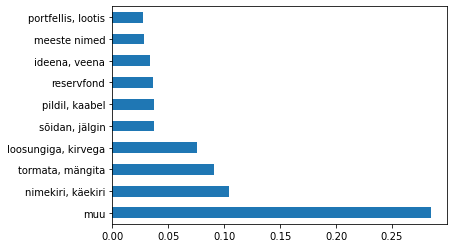

In [202]:
df_male_ft.cluster_hdb_name.value_counts(normalize=True).head(10).plot(kind='barh')

<AxesSubplot:>

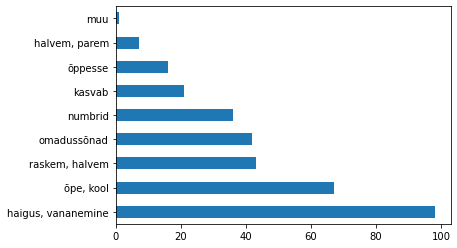

In [195]:
df_female_ft.cluster_hdb_name.value_counts().plot(kind='barh')

Text(0, 0.5, '')

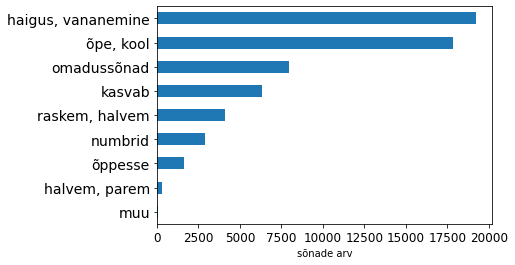

In [208]:
ax=df_female_ft.groupby('cluster_hdb_name')['count'].sum().sort_values().plot(kind='barh')
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('sõnade arv')
plt.ylabel('')

Text(0, 0.5, '')

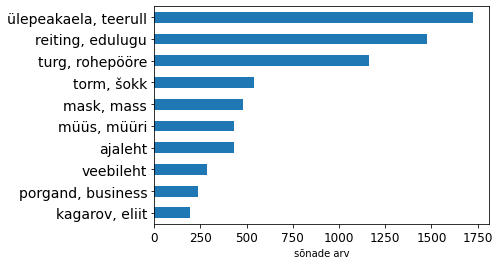

In [209]:
df_male_ft.groupby('cluster_hdb_name')['count'].sum().sort_values().head(10).plot(kind='barh')
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('sõnade arv')
plt.ylabel('')